```
     _                                     ____             _       _   ____                                    
    / \   _ __ ___   __ _ _______  _ __   / ___|  ___   ___(_) __ _| | |  _ \ _ __ ___   __ _ _ __ ___  ___ ___ 
   / _ \ | '_ ` _ \ / _` |_  / _ \| '_ \  \___ \ / _ \ / __| |/ _` | | | |_) | '__/ _ \ / _` | '__/ _ \/ __/ __|
  / ___ \| | | | | | (_| |/ / (_) | | | |  ___) | (_) | (__| | (_| | | |  __/| | | (_) | (_| | | |  __/\__ \__ \
 /_/   \_\_| |_| |_|\__,_/___\___/|_| |_| |____/ \___/ \___|_|\__,_|_| |_|   |_|  \___/ \__, |_|  \___||___/___/
                                                                                        |___/                   
```

### Module
__PLSRegression__ Partial Least Squares regression.

### Goal
Investigating the relationship between independent variables or features and a dependent variable or outcome.

### Tools
1. Pandas
2. scikit-learn
3. PLSRegression

### Requirement
1. File Definition
2. Data Preparation
3. hotspot_spi.csv generated
 
### Data Source
__${WORKDIR}__/data/ouptut/hotspot_spi.csv

In [1]:
import os
import sys

supervised_dir = os.path.normpath(os.getcwd() + os.sep + os.pardir)
sys.path.append(supervised_dir)
sys.path

['/home/fausto/Development/workspace/amazon-social-progress/ml_models/supervised/regression',
 '/opt/anaconda3/lib/python39.zip',
 '/opt/anaconda3/lib/python3.9',
 '/opt/anaconda3/lib/python3.9/lib-dynload',
 '',
 '/opt/anaconda3/lib/python3.9/site-packages',
 '/home/fausto/Development/workspace/amazon-social-progress/ml_models/supervised']

In [ ]:
import pandas as pd
import numpy as np

import functions_regression as freg
from  load_dataset import LoadDataset, SpiType

from sklearn.cross_decomposition import PLSRegression

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

## Get the data

In [ ]:
load_dataset = LoadDataset()
X, y = load_dataset.return_X_y_regr(spi_type = SpiType.INDICATORS)

columns_names = X.columns

X = scale(X)

In [ ]:
print("X.shape:", X.shape, "y.shape:", y.shape)

X.shape: (2313, 49) y.shape: (2313,)


### Split dataset into train and test sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

print("X_train.shape:", X_train.shape, "y_train.shape:", y_train.shape)
print("X_test.shape:", X_test.shape, "y_test.shape:", y_test.shape)

X_train.shape: (1619, 49) y_train.shape: (1619,)
X_test.shape: (694, 49) y_test.shape: (694,)


## Modeling

### Building, train and predict model

In [20]:
params = {
   'max_iter': 500, 
    'n_components': 5, 
    'tol': 1e-2
}

regressor = PLSRegression(**params)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

### Getting Best Hyperparameter Optimization

*Note: The execution of the code below may take a few minutes or hours.*

*Uncomment and run it when you need to optimize hyperparameters.*

In [12]:
# from sklearn.model_selection import (GridSearchCV)
# import warnings

# warnings.filterwarnings("ignore")

# parameters = {
#     "n_components":[1, 2, 3, 4, 5],
#     "max_iter": [500, 1000, 2000, 3000, 4000, 5000],
#     "tol": [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7]
# }

# gridsearch = GridSearchCV(PLSRegression(), parameters)
# gridsearch.fit(X_train, y_train)

# print("Tuned Hyperparameters :", gridsearch.best_params_)
# print("Best Score:",gridsearch.best_score_)

Tuned Hyperparameters : {'max_iter': 500, 'n_components': 5, 'tol': 0.01}
Best Score: 0.3861139468661376


### Model Evaluation

In [14]:
freg.evaluate_model(regressor, X, y, X_train, y_train, X_test, y_test, y_pred)


Model-evaluation
----------------------------------------------------------------------
Score: 0.4310
CV train mean score:0.3905
K-fold CV average score: 0.38
R²: 0.3375
Max Error: 4123.8440
Explained Variance: 0.3375
MSE: 298839.6091
RMSE: 149419.8045
MAE: 442.7253


### Plor Prediction Result

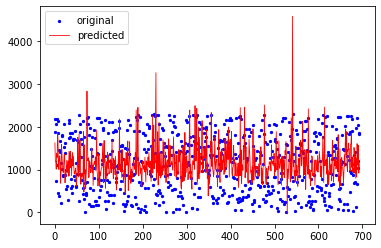

In [ ]:
freg.plot_prediction_result(y_test, y_pred)